In [1]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,Input
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16


Using TensorFlow backend.


In [8]:
num_classes=5 
img_size=64

weight_path = r'C:\Users\Saran Charan\Downloads\vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

image_input = Input(shape=(64, 64, 3))
model = VGG16(input_tensor=image_input, include_top=False, weights= weight_path)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [9]:
last_layer = model.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(128, activation='relu', name='fc2')(x)
out = Dense(num_classes, activation='softmax', name='output')(x)

In [10]:
transfer_model = Model(image_input, out)
transfer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [11]:
for layer in transfer_model.layers[:-3]:
    layer.trainable = False
    
    
transfer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [12]:
transfer_model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
batch_size=100

data_generator = ImageDataGenerator(rescale=1./255)

data_generator_with_aug = ImageDataGenerator(horizontal_flip=True,
                                            rescale=1./255,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2)

train_generator = data_generator_with_aug.flow_from_directory(r'C:\Users\Saran Charan\Desktop\Flowers Dataset\train',
                                                             batch_size=batch_size,
                                                             target_size=(img_size,img_size),
                                                             class_mode='categorical')

validation_generator = data_generator.flow_from_directory(r'C:\Users\Saran Charan\Desktop\test',
                                                         batch_size=batch_size,
                                                         target_size=(img_size,img_size),
                                                         class_mode='categorical') 
history = transfer_model.fit_generator(train_generator,
                   steps_per_epoch=50,
                   epochs=10,
                   validation_data = validation_generator,
                   validation_steps = 1)

Found 2500 images belonging to 5 classes.
Found 250 images belonging to 5 classes.
Epoch 1/10
50/50 [==============================] - 502s 10s/step - loss: 1.1155 - acc: 0.5638 - val_loss: 0.9648 - val_acc: 0.6300
Epoch 2/10
50/50 [==============================] - 474s 9s/step - loss: 0.8201 - acc: 0.6888 - val_loss: 0.9065 - val_acc: 0.6400
Epoch 3/10
50/50 [==============================] - 479s 10s/step - loss: 0.7605 - acc: 0.7114 - val_loss: 0.8218 - val_acc: 0.6600
Epoch 4/10
50/50 [==============================] - 477s 10s/step - loss: 0.6961 - acc: 0.7450 - val_loss: 0.7847 - val_acc: 0.7100
Epoch 5/10
50/50 [==============================] - 489s 10s/step - loss: 0.6476 - acc: 0.7578 - val_loss: 0.7493 - val_acc: 0.7200
Epoch 6/10
50/50 [==============================] - 476s 10s/step - loss: 0.5970 - acc: 0.7826 - val_loss: 0.7376 - val_acc: 0.7300
Epoch 7/10
50/50 [==============================] - 473s 9s/step - loss: 0.5770 - acc: 0.7902 - val_loss: 0.7292 - val_acc: 0.

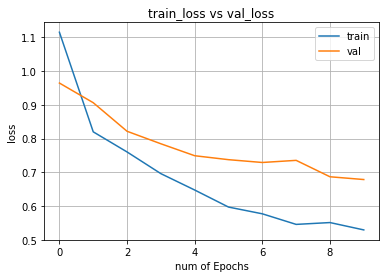

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

training_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['acc']
val_acc = history.history['val_acc']


plt.plot(training_loss)
plt.plot(val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])

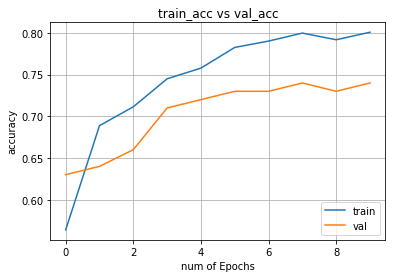

In [17]:
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)

In [23]:
from keras.preprocessing import image
import numpy as np
from keras.applications.vgg16 import preprocess_input, decode_predictions

img_path = r'C:\Users\Saran Charan\Desktop\Flowers Dataset\validation\roses\16643944275_3cd4cd966c.jpg'
img = image.load_img(img_path,target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
prediction = transfer_model.predict(x)
print('Predictions:', prediction)


Predictions: [[ 0.  0.  1.  0.  0.]]


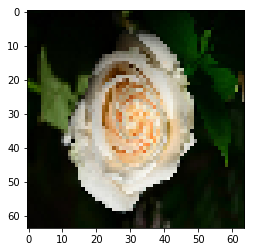

In [30]:
plt.imshow(img)
plt.show()